In [47]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import random

In [48]:

train = pd.read_csv('./features/the_activity.csv').fillna(0)
X = train.iloc[:,:22]  # 特征矩阵
y = train.iloc[:,-1]  # 目标变量

In [49]:
importance = np.zeros((22,))
degree = 0.5
for i in range(100):
       random_seed = random.randint(1,100)
       
       random_max_depth = random.randint(2,30)
       random_learning_rate = random.randint(1,100)/100
       random_n_estimators = random.randint(20,100)
      
      ####xgb模型
       xgboost_model = xgb.XGBClassifier(n_estimators=11,max_depth=3,learning_rate=0.26, min_child_weight = 0.5, gamma=0.74,reg_alpha=0.57,
                                                scale_pos_weight=1)
       xgboost_model.fit(X, y)
       xgb_importance = xgboost_model.feature_importances_
       
       ###随机森林模型
       rf_model = RandomForestClassifier(n_estimators=38, max_depth=1,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=2,
                                  min_impurity_decrease=0.1,random_state=random_seed) 
       rf_model.fit(X,y)
       rf_importance = rf_model.feature_importances_

       ####按照比例累加起来
       importance += degree*xgb_importance + (1-degree)*rf_importance


<class 'numpy.ndarray'>
(22,)


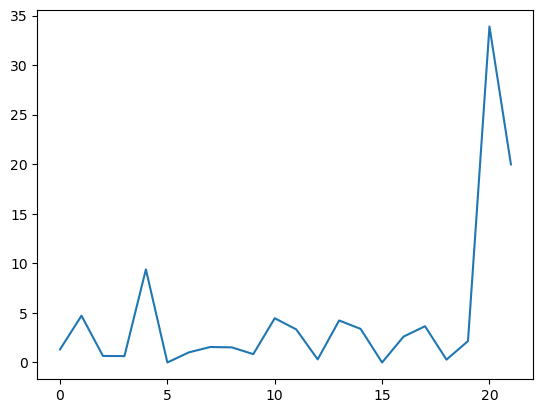

In [50]:
print(type(importance))
print(importance.shape)
plt.plot(importance)

In [51]:
the_index = np.argsort(-importance)
print('重要性从大到小的顺序是',the_index)
print('它们的重要性值是',importance[the_index])


重要性从大到小的顺序是 [20 21  4  1 10 13 17 14 11 16 19  7  8  0  6  9  2  3 12 18 15  5]
它们的重要性值是 [33.89518345 19.98038613  9.39122459  4.71869558  4.46124673  4.23637682
  3.65577824  3.38701271  3.33927833  2.61151449  2.15724837  1.56166538
  1.52430935  1.31664034  1.02077348  0.8417877   0.65939899  0.64252973
  0.31209845  0.28684782  0.          0.        ]


In [53]:
importance_df = pd.DataFrame(importance).T
print(importance_df)
importance_df.to_csv('fea_importance/the_activity_importance.csv')

        0         1         2        3         4    5         6         7   \
0  1.31664  4.718696  0.659399  0.64253  9.391225  0.0  1.020773  1.561665   

         8         9   ...        12        13        14   15        16  \
0  1.524309  0.841788  ...  0.312098  4.236377  3.387013  0.0  2.611514   

         17        18        19         20         21  
0  3.655778  0.286848  2.157248  33.895183  19.980386  

[1 rows x 22 columns]
